# Data Visual Analytics for Insurance Example

### Adopted style from [Randal S. Olson](http://www.randalolson.com/) 
### The visual analytic flow is taken from [Dandelion] (https://www.kaggle.com/hely333)
### The codes are edited by ASKS Data Science Group
#### Supported by [THRES]

## Table of contents

1. [License](#License)

2. [Step 1: The Data](#Step-1:-The-Data)

3. [Step 2: The Visualization](#Step-2:-The Visualization)

4.  - [Correlation Heat Map](#Correlation-Heat-Map)

4.  - [Distribution Map](#Distribution-Map)

6. [Step 4: Exploratory analysis](#Step-4:-Exploratory-analysis)

7. [Step 5: Classification](#Step-5:-Classification)

    - [Cross-validation](#Cross-validation)

    - [Parameter tuning](#Parameter-tuning)

8. [Step 6: Reproducibility](#Step-6:-Reproducibility)

9. [Further reading](#Further-reading)



## License

Please see the original [repository README file](https://github.com/rhiever/Data-Analysis-and-Machine-Learning-Projects#license) for the licenses and usage terms for the instructional material and code in this notebook. I cloned and then edited it from the original authors. For any further usage, please follows them.

### Step 1: The Data

Yesterday, we explored the insurance data set. Let try to see if we can visualize it better. Since, we have cleaned it, let's start from there.

In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

insurance_data = pd.read_csv('../data/insurance_reg.csv')

In [2]:
insurance_data.head()

,Unnamed: 0,age,bmi,children,charges,sex_code,smoker_code,region_code
0,0,19,27.900,0,16884.92400,0,1,0
1,1,18,33.770,1,1725.55230,1,0,3
2,2,28,33.000,3,4449.46200,1,0,3
3,3,33,22.705,0,21984.47061,1,0,1
4,4,32,28.880,0,3866.85520,1,0,1


### Step 2: The Visualization

One of the first plot that we can try is the heat map point. But we will not just plot any value. From yesterday, 
we saw that the scatter points did not tell us much. We can actually embeded more information into it. Note that we had cut any entry with charge over 60,000.

#### Correlation Heat Map

Next we will plot the correlation value between features as heatmap. (Dataframe has .corr() function for the correlation.)

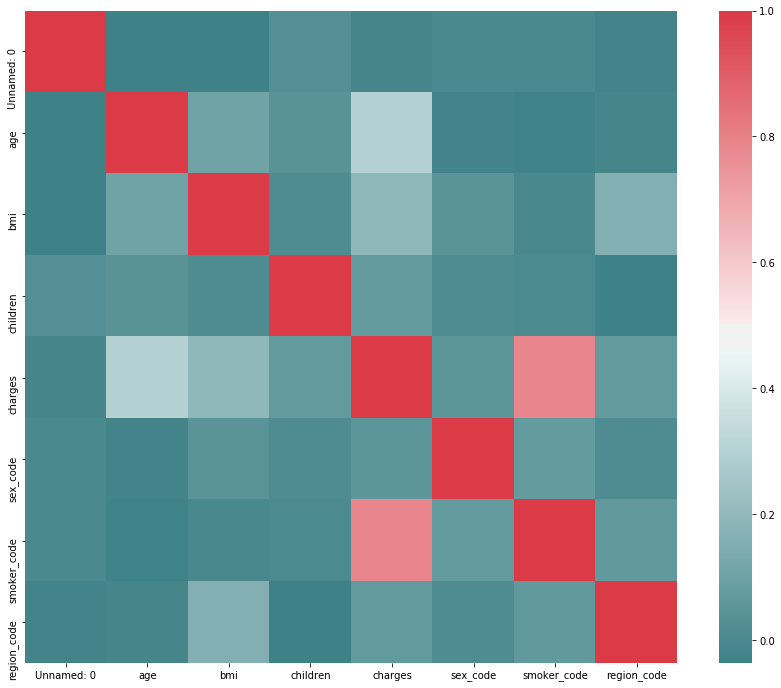

In [4]:
fi, axis = plt.subplots(figsize=(15, 12))
corr = insurance_data.corr()
sb.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sb.diverging_palette(200,10,as_cmap=True), 
           square=True, ax=axis)

#### Distribution Map

Can you now see which value is correlated with the charges? What does the "charges" look like? And what are the distributions of the medical charges of the smokers vs. the non-smokers?
This will help us to know how much patients spend on treatment on average. The histogram, the distplot, the violin, and the boxplot are the commmon plots to show the distribution.

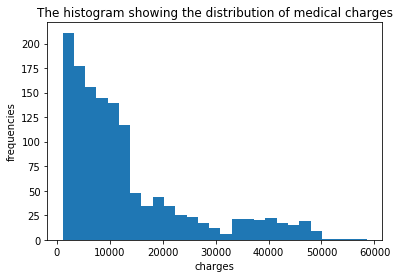

In [5]:
plt.hist(insurance_data.charges, bins='auto')  # arguments are passed to np.histogram
plt.title("The histogram showing the distribution of medical charges")
plt.xlabel('charges')
plt.ylabel('frequencies')
plt.show()

We can beautify the histogram with Bokeh.

In [8]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()
import scipy.special
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file

hist_pic = figure(title="Distribution of charges",tools="save", background_fill_color="#f7fbff")
hist, edges = np.histogram(insurance_data.charges)
hist_pic.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],fill_color="#084594", line_color="#033649")
hist_pic.xaxis.axis_label = 'charges'
hist_pic.yaxis.axis_label = 'frequencies'
show(hist_pic)

Loading BokehJS ...

Text(0.5, 1.0, 'The distribution of the medical charges for the smokers')

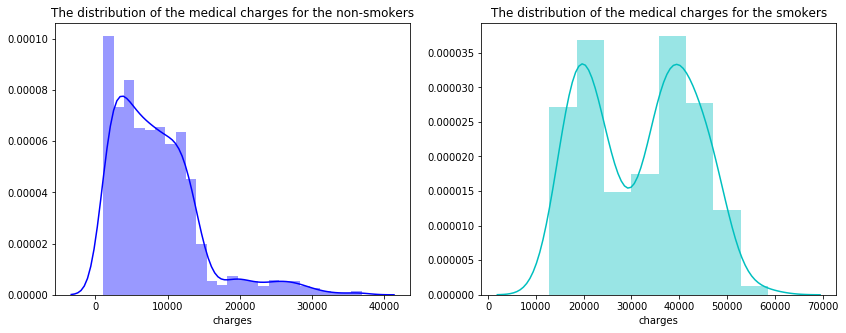

In [10]:
fi= plt.figure(figsize=(14,5))

axis=fi.add_subplot(121)
sb.distplot(insurance_data[(insurance_data.smoker_code == 0)]['charges'],color='b',ax=axis)
axis.set_title('The distribution of the medical charges for the non-smokers')

axis=fi.add_subplot(122)
sb.distplot(insurance_data[(insurance_data.smoker_code == 1)]['charges'],color='c',ax=axis)
axis.set_title('The distribution of the medical charges for the smokers')

The medical charges are lower for the non-smokers. It also seems like there are two groups of people in the smokers. But from the histogram, the number of non-smoking patients seems to be greater. We can highlight it with the catplot.

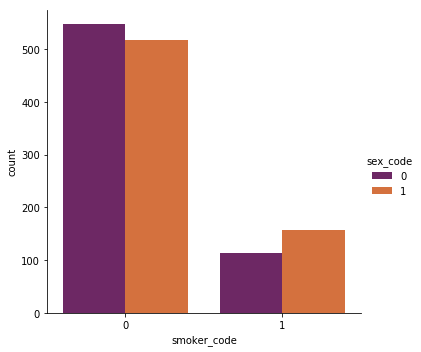

In [11]:
sb.catplot(x="smoker_code", kind="count",hue = 'sex_code', palette="inferno", data=insurance_data)

Please note that female is coded with "0"and male with "1", while smoker is coded with "1", and non-smoker is coded with "0". What can we say based on the graph?
We can also use the violin graph (from yesterday) to highlight our finding. 

***Notice how we swap the numerical with the categorical feature to highlight the different***

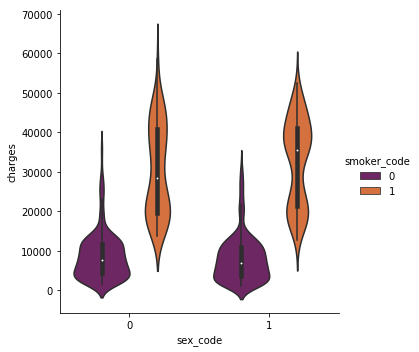

In [12]:
sb.catplot(x="sex_code", y="charges", hue="smoker_code", kind="violin", palette = 'inferno', data=insurance_data)

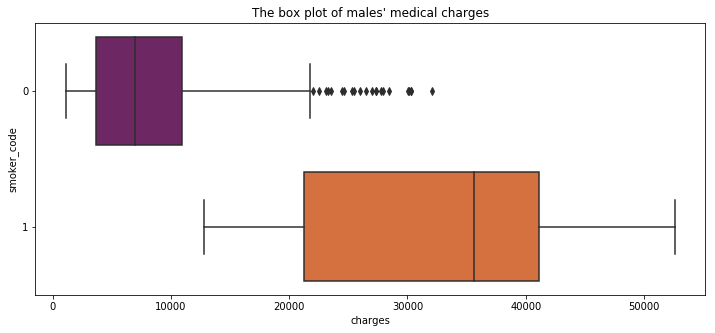

In [14]:
plt.figure(figsize=(12,5))
plt.title("The box plot of males' medical charges")
sb.boxplot(y="smoker_code", x="charges", data = insurance_data[(insurance_data.sex_code == 1)] 
            ,orient="h", palette = 'inferno')

Try to plot the same boxplot for female below.

In [ ]:
plt.figure(figsize=(12,5))
plt.title("The box plot of males' medical charges")
sb.boxplot(y="smoker_code", x="charges", data = insurance_data[(insurance_data.sex_code == 0)] 
            ,orient="h", palette = 'inferno')

Age did not show any correlation with the charge. Let use the distribution plot to check that.

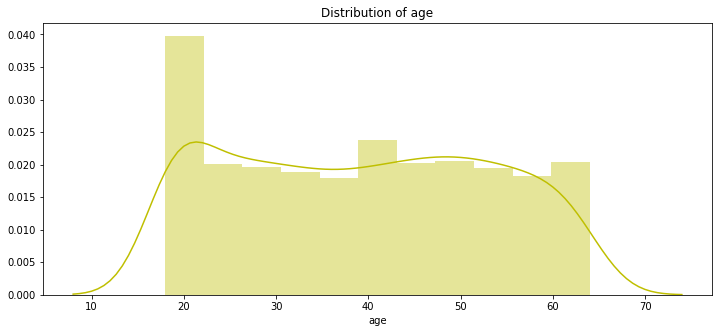

In [19]:
plt.figure(figsize=(12,5))
plt.title("Distribution of age")
ax = sb.distplot(insurance_data["age"], color = 'y')

We have patients under 20 in our data set. Im 18 years old. This is the minimum age of patients in our set. The maximum age is 64 years. 
My personal interest is whether there are smokers among patients 18 years.

Text(0.5, 1.0, 'The number of smokers and non-smokers (18 years old)')

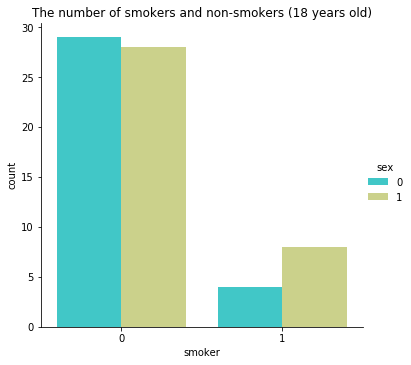

In [23]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rainbow", data=data[(data.age == 18)])
pl.title("The number of smokers and non-smokers (18 years old)")

Oh. I was hoping the result would be different.
18 years old - a very young age. Does smoking affect the cost of treatment at this age?


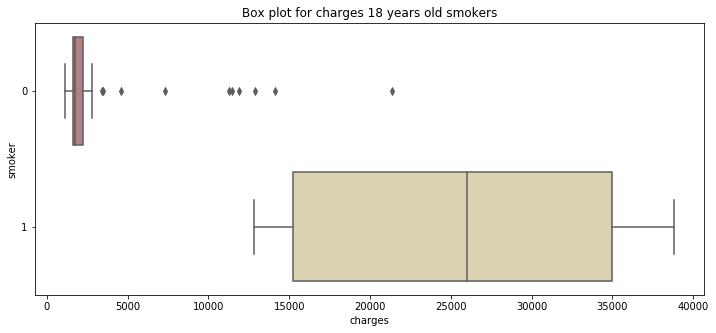

In [24]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges 18 years old smokers")
sns.boxplot(y="smoker", x="charges", data = data[(data.age == 18)] , orient="h", palette = 'pink')

![![image.png](attachment:image.png)](https://media.giphy.com/media/bgGainulgkZhK/giphy.gif)

Oh. As we can see, even at the age of 18 smokers spend much more on treatment than non-smokers. Among non-smokers we are seeing some " tails." I can assume that this is due to serious diseases or accidents.
Now let's see how the cost of treatment depends on the age of smokers and non-smokers patients.

Text(0.5, 1.0, 'Distribution of charges and age for non-smokers')

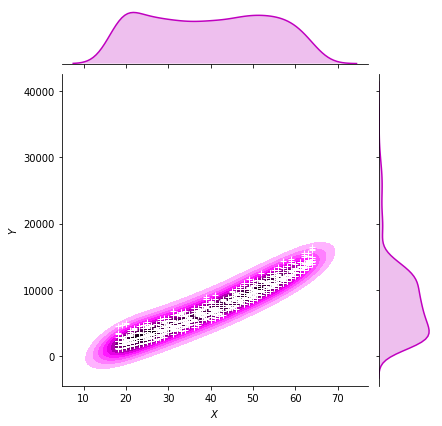

In [25]:
g = sns.jointplot(x="age", y="charges", data = data[(data.smoker == 0)],kind="kde", color="m")
g.plot_joint(pl.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for non-smokers')

Text(0.5, 1.0, 'Distribution of charges and age for smokers')

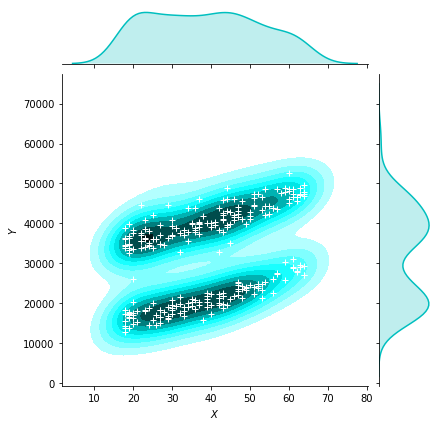

In [26]:
g = sns.jointplot(x="age", y="charges", data = data[(data.smoker == 1)],kind="kde", color="c")
g.plot_joint(pl.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for smokers')

In [27]:
#non - smokers
p = figure(plot_width=500, plot_height=450)
p.circle(x=data[(data.smoker == 0)].age,y=data[(data.smoker == 0)].charges, size=7, line_color="navy", fill_color="pink", fill_alpha=0.9)

show(p)

In [28]:
#smokers
p = figure(plot_width=500, plot_height=450)
p.circle(x=data[(data.smoker == 1)].age,y=data[(data.smoker == 1)].charges, size=7, line_color="navy", fill_color="red", fill_alpha=0.9)
show(p)

Text(0.5, 1.0, 'Smokers and non-smokers')

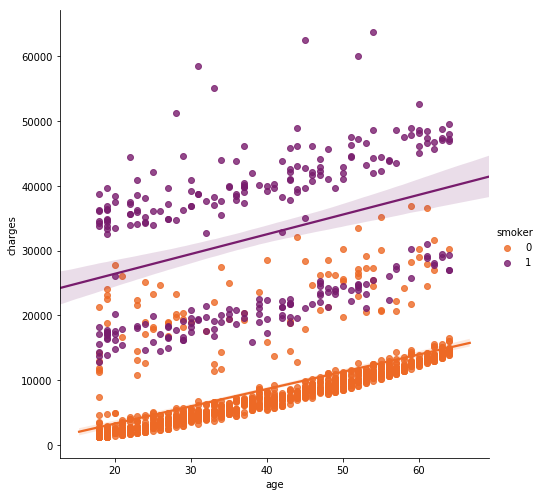

In [29]:

sns.lmplot(x="age", y="charges", hue="smoker", data=data, palette = 'inferno_r', size = 7)
ax.set_title('Smokers and non-smokers')

In non-smokers, the cost of treatment increases with age. That makes sense. So take care of your health, friends!  In smoking people, we do not see such dependence.
I think that it is not only in smoking but also in the peculiarities of the dataset. Such a strong effect of Smoking on the cost of treatment would be more logical to judge having a set of data with a large number of records and signs.
But we work with what we have!
Let's pay attention to bmi. I am surprised that this figure but affects the cost of treatment in patients. Or are we on a diet for nothing?
![![image.png](attachment:image.png)](https://img-s3.onedio.com/id-573af11b92f0c0f951a8561a/rev-0/raw/s-606439d8c0c1e9e794286a8431f3a54c57f31033.gif)

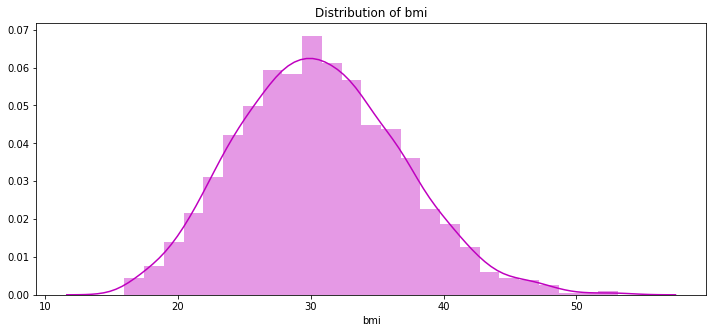

In [30]:
pl.figure(figsize=(12,5))
pl.title("Distribution of bmi")
ax = sns.distplot(data["bmi"], color = 'm')

There's something insanely beautiful about this distribution, isn't there?  
The average BMI in patients is 30. I think I should go to the great Google with a question about this indicator. 
![![image.png](attachment:image.png)](http://1j4g1pasf991x0osxuqz6d10.wpengine.netdna-cdn.com/wp-content/uploads/2017/03/BMI-CHART-1024x791.png)
With a value equal to 30 starts obesity.  I also calculated my BMI and now I can safely eat a sandwich. Let's start to explore!
First, let's look at the distribution of costs in patients with BMI greater than 30 and less than 30.


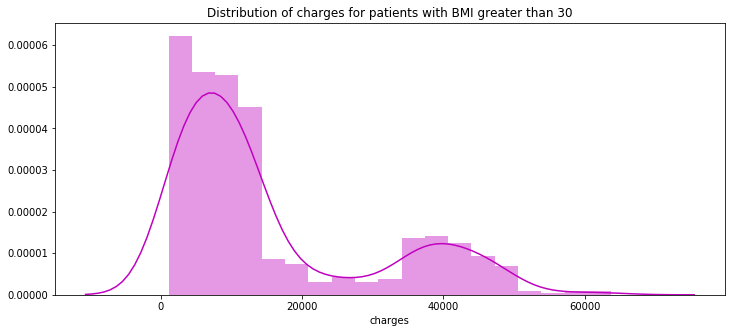

In [31]:
pl.figure(figsize=(12,5))
pl.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(data[(data.bmi >= 30)]['charges'], color = 'm')

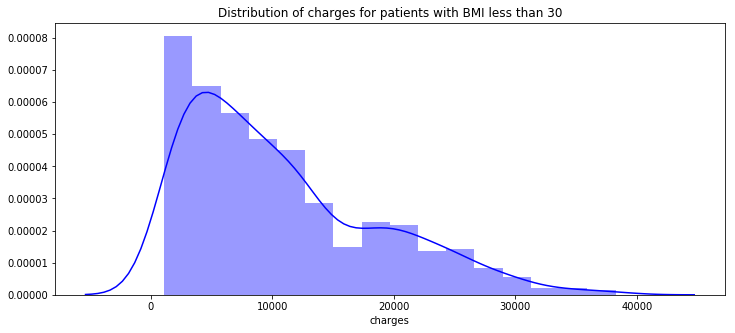

In [32]:
pl.figure(figsize=(12,5))
pl.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(data[(data.bmi < 30)]['charges'], color = 'b')

Patients with BMI above 30 spend more on treatment!

Text(0.5, 1.0, 'Distribution of bmi and charges')

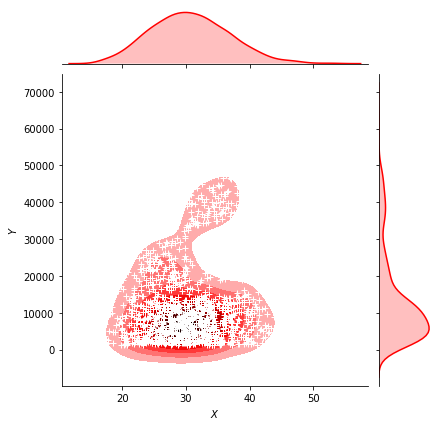

In [33]:
g = sns.jointplot(x="bmi", y="charges", data = data,kind="kde", color="r")
g.plot_joint(pl.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of bmi and charges')


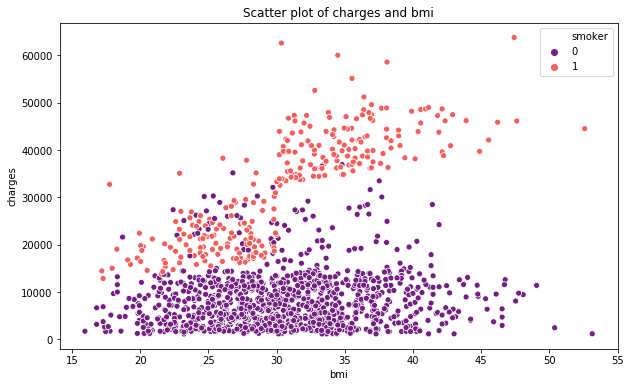

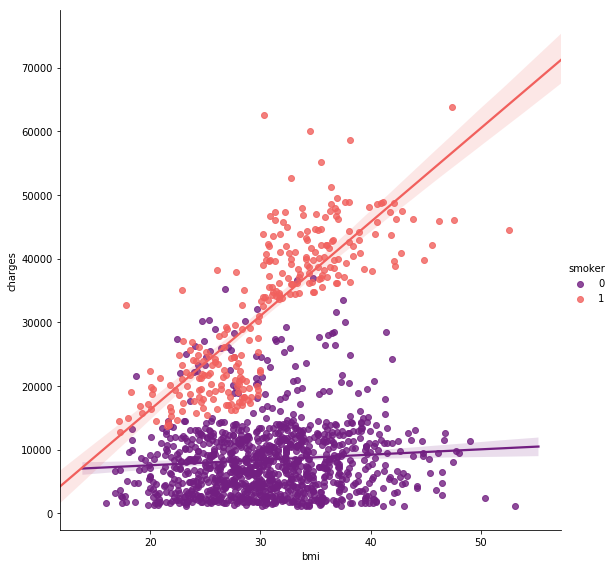

In [34]:
pl.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=data,palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and bmi')

sns.lmplot(x="bmi", y="charges", hue="smoker", data=data, palette = 'magma', size = 8)

Let's pay attention to children. First, let's see how many children our patients have.


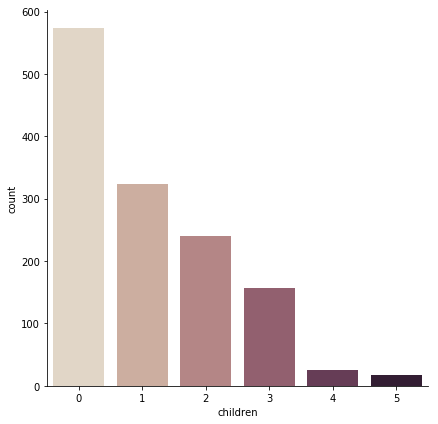

In [35]:
sns.catplot(x="children", kind="count", palette="ch:.25", data=data, size = 6)

Most patients do not have children. Perfectly that some have 5 children! Children are happiness:)
I wonder if people who have children smoke.

Text(0.5, 1.0, 'Smokers and non-smokers who have childrens')

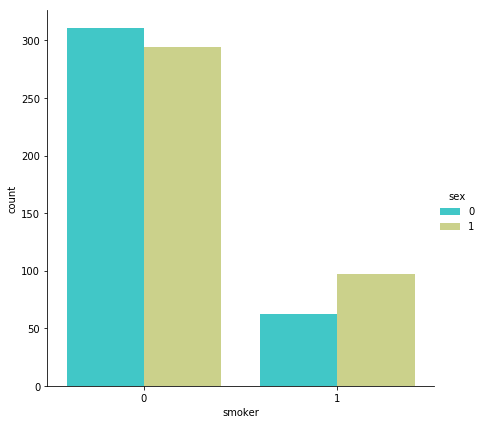

In [36]:
sns.catplot(x="smoker", kind="count", palette="rainbow",hue = "sex",
            data=data[(data.children > 0)], size = 6)
ax.set_title('Smokers and non-smokers who have childrens')

Oh oh oh.....
![![image.png](attachment:image.png)](https://www.az-jenata.bg/media/az-jenata/files/galleries/640x480/4c0373972cdd156a2e2c008dc5c0a93a.jpg)
But I am glad that non-smoking parents are much more!